In [1]:
# Initialize stuff
import matplotlib
matplotlib.use('nbagg')
import numpy as np

from xraycam import camcontrol
from xraycam.camcontrol import plt

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [68]:
def runset_and_merge(run_prefix, number_runs, run = False, threshold_min = 31, threshold_max =  55, **kwargs):
    """Returns a Frame"""
    runset = camcontrol.RunSet(run_prefix= run_prefix,
        run = run, number_runs = number_runs, **kwargs)
    return runset.filter_reduce_frames(threshold_min = threshold_min, threshold_max = threshold_max)
def runset_merge_plot(*args, rebin = 10, **kwargs):
    frame = runset_and_merge(*args, **kwargs)
    return frame, frame.plot_lineout(rebin = rebin)

### Compare lineouts with and without frame-by-frame filtering 

In [3]:
run_nofilter = runset_merge_plot('data/5.11.nofilter3', 30, gain = '0x3f',
        numExposures = 400, run = False, threshold_min = 31, threshold_max = 55)

In [23]:
run_filter = runset_merge_plot('data/5.11.filter2', 30, gain = '0x3f',
        numExposures = 400, run = False, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55)

In [5]:
plt.show()

### Why does filtering increase count rate? Comparing the following three curves suggests that post-filtering causes a substantial loss of signal that's recovered in frame-by-frame filtering:

In [8]:
[runset_merge_plot('data/5.11.nofilter3', 30, run = False, threshold_min = i, threshold_max = j) for i, j in ((31, 55), (13, 155))]
runset_merge_plot('data/5.11.filter2', 30, run = False, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55)
plt.show()

### After peak normalization it's more apparent that frame-by-frame filtering reduces background:

In [7]:
plt.plot(run_nofilter/np.max(run_nofilter), label = 'filter off')
plt.plot(run_filter/np.max(run_filter), label = 'filter on')
plt.show()

### Image:

<IPython.core.display.Javascript object>


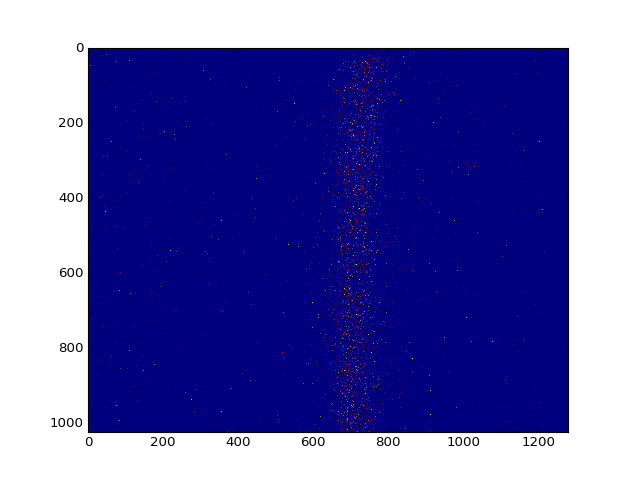

In [56]:
plt.imshow(runset_and_merge('data/5.11.filter2', 30, run = False, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55).get_data(), vmin = 0, vmax = 50)
plt.show()

### Pixel value histogram:

In [36]:
hist = np.histogram(run_filter_arr, bins = 255)
plt.plot(hist[1][:-1], hist[0], label = '')
plt.show()

### Final thought: frame-by-frame filtering also makes longer exposure sequences possible, which reduces data storage requirements.

### Dark exposures:

<IPython.core.display.Javascript object>


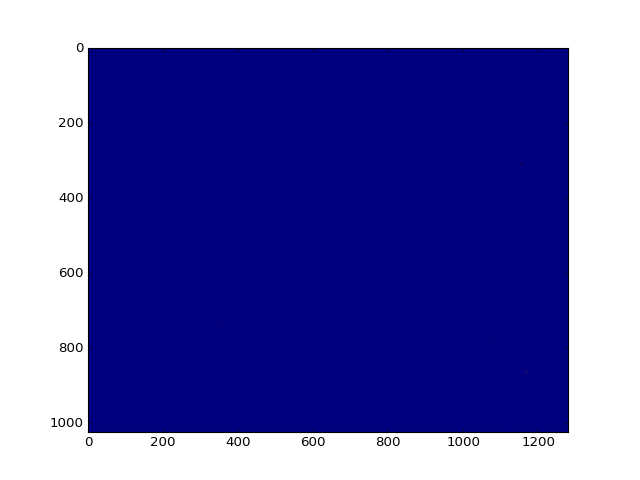

3912

In [108]:
arr = runset_and_merge('data/5.12.dark2', 30, run = False, gain = '0x3f',
        numExposures = 400, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = 55).get_data()
plt.imshow(arr, vmin = 31, vmax = 55)
plt.show()
np.sum(arr)

In [69]:
frames_lineouts = [runset_merge_plot('data/5.13.long', 1, gain = '0x3f',
        numExposures = 60000, run = False, window_min = 31, window_max = 55,
        threshold_min = 31, threshold_max = tmax, rebin = 5) for tmax in [55, 255]]
plt.show()

<IPython.core.display.Javascript object>


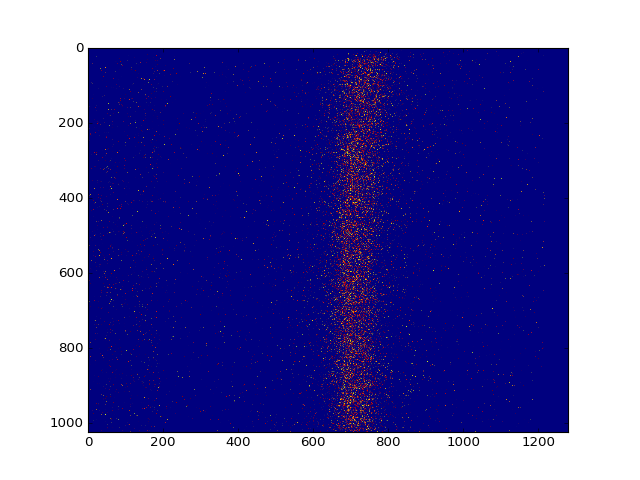

<IPython.core.display.Javascript object>


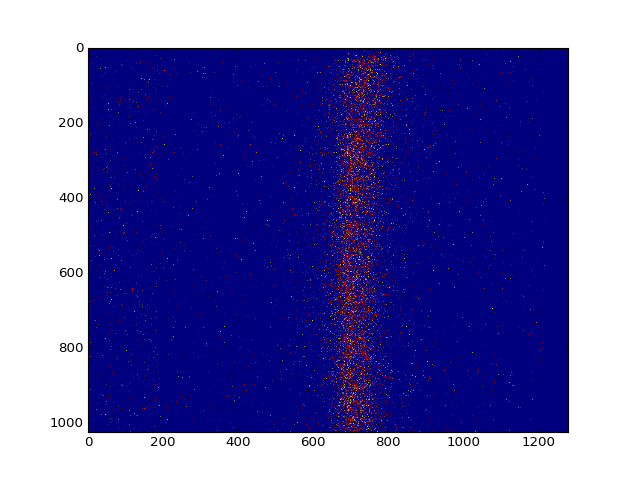

[1504704, 1884321]


In [114]:
frames_lineouts[0][0].show(vmax = 50)
frames_lineouts[1][0].show(vmax = 50)
print(list(map(lambda f: np.sum(f[0].data), frames_lineouts)))

In [115]:
import copy
frame = copy.deepcopy(frames_lineouts[1][0])

In [116]:
def lineout_subregion(cutoff):
    import copy
    frame = copy.deepcopy(frames_lineouts[0][0])
    frame.data = frame.data[cutoff:, :]
    return frame.plot_lineout(rebin = 8, error_bars = False)

In [117]:
linouts = [lineout_subregion(c) for c in [500, 400, 250, 0]]
plt.show()

In [118]:
[plt.plot(l/np.max(l)) for l in linouts]
plt.show()

In [7]:
ls -lt data

total 2032688
-rw-r--r-- 1 oliver oliver 5242880 May 14 13:02 5.13.long2_48sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 12:42 5.13.long2_47sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 12:22 5.13.long2_46sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 12:02 5.13.long2_45sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 11:41 5.13.long2_44sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 11:21 5.13.long2_43sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 11:01 5.13.long2_42sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 10:41 5.13.long2_41sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 10:21 5.13.long2_40sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 10:00 5.13.long2_39sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 09:40 5.13.long2_38sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 09:20 5.13.long2_37sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 09:00 5.13.long2_36sum.dat
-rw-r--r-- 1 oliver oliver 5242880 May 14 08:39 5.13.long2_35sum.dat
-rw-r--r-- 1 oliver 